<a href="https://colab.research.google.com/github/dashami1999/ML-miniproject-/blob/master/ML(miniprojecT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install bing-image-downloader

In [2]:
!ls

drive  sample_data


In [6]:
cd /content/drive/My Drive

/content/drive/My Drive


In [7]:
!mkdir images

In [8]:
cd images

/content/drive/My Drive/images


In [9]:
from bing_image_downloader import downloader
downloader.download("Strawberry fruit",limit = 20, output_dir = 'images')



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from http://4.bp.blogspot.com/-81hQq5sc8R0/Uiok68HyvPI/AAAAAAAABPM/Zg3_5eLKGIk/s1600/strawberries1.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://confettiblues.files.wordpress.com/2011/02/strawberryfruit.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.thermofisher.com/blog/wp-content/uploads/sites/5/2015/08/single_strawberry__isolated_on_a_white_background.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://thumbs-prod.si-cdn.com/0WNVhEgcV-c7OdwE4GXG2Tl4XMo=/fit-in/1600x0/https://public-media.si-cdn.com/filer/39/3c/393c51d9-ce11-49ce-9d41-5ef599dfabea/bn8e34.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://images6.fanpop.com/image/photos/34900000/Strawberry-fruit-34914839-1920-1200.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://1.bp.blogspot.com/-pNGHQLkRuKw/UDBJwtLOucI/AAAAAAAAA0Q/g6_zcXUBcMA/s1600/Strawberry-3.jpg
[%] 

In [10]:
from bing_image_downloader import downloader
downloader.download("Litchi fruit",limit = 20, output_dir = 'images')



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://vespertunes.files.wordpress.com/2015/11/1_lichee.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://1.bp.blogspot.com/-NDbJ_zcM0hE/T-AAqmQkgQI/AAAAAAAACM8/QLt4lAuiEhU/s1600/Lychee_Litchi_Chinensis_sweet_tasty_fruit03.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.thespruceeats.com/thmb/FmbwudINovXRvseoaRXcTl0Upo4=/6000x4000/filters:fill(auto,1)/ripe-and-fresh-litchi-fruit-969751138-5c5b669a46e0fb0001587369.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://usamakady.files.wordpress.com/2013/05/hs_lychee.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.britannica.com/18/176518-050-5AB1E61D/lychee-fruits-Southeast-Asia.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://4.bp.blogspot.com/-lYpk2Q4aYKE/UZWoNI4PVLI/AAAAAAAADCs/6rIhM5JuZJ0/s1600/brewster_lychee_fruit1.jpg
[%] File Downloaded !

[%] Downloading Image 

In [11]:
downloader.download?

In [12]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [14]:
target = []   
flat_data = []   
images= []

path = '/content/drive/My Drive/images/images/'
for dirpath, dirnames, filenames in os.walk(path):
  for filename in filenames:
    category = dirpath.split('/')[-1]
    target.append(category)
    img = imread(f'{path}{category}/{filename}')
    img_resized = resize(img,(50,50,3))  
    flat_data.append(img_resized.flatten())
    images.append(img_resized)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

print(flat_data.shape)
print(target.shape)
print(images.shape)

(40, 7500)
(40,)
(40, 50, 50, 3)


In [15]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target

In [26]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,0.980392,0.968627,0.933333,0.972549,0.960784,0.921569,0.968627,0.952941,0.909804,0.962745,0.947373,0.901961,0.956863,0.941490,0.894118,0.956863,0.937255,0.890196,0.952941,0.937255,0.890196,0.949020,0.933333,0.886275,0.949020,0.933333,0.886275,0.949020,0.933333,0.886275,0.949020,0.933333,0.886275,0.952941,0.933333,0.886275,0.952941,0.937255,0.890196,0.956863,...,0.921569,0.895765,0.846745,0.925490,0.905882,0.858824,0.925490,0.909804,0.862745,0.925490,0.913725,0.866667,0.925490,0.913725,0.866667,0.929412,0.913725,0.870588,0.937255,0.925490,0.886275,0.941176,0.929412,0.890196,0.945098,0.933333,0.894118,0.968627,0.958824,0.927451,0.992157,0.992157,0.976471,0.992157,0.992157,0.980392,0.992157,0.992157,0.980392,Strawberry fruit
1,0.988235,0.992157,0.972549,0.988235,0.992157,0.972549,0.992157,0.996078,0.976471,0.992157,0.996078,0.976471,0.992157,0.996078,0.976471,0.992157,0.996078,0.976471,0.992157,0.996078,0.976471,0.992157,0.996078,0.976471,0.996078,0.996078,0.976471,0.996078,0.996078,0.980392,0.996078,0.996078,0.980392,0.996078,0.996078,0.980392,0.996078,0.996078,0.980392,0.996078,...,0.968627,0.960784,0.909804,0.968627,0.960784,0.909804,0.968627,0.960784,0.905882,0.968627,0.960784,0.909804,0.968627,0.960784,0.909804,0.964706,0.956863,0.894118,0.964706,0.952941,0.894118,0.964706,0.952941,0.890196,0.964706,0.952941,0.890196,0.964706,0.956863,0.898039,0.968627,0.956863,0.901961,0.968627,0.956863,0.901961,0.968627,0.956863,0.898039,Strawberry fruit
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Strawberry fruit
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Strawberry fruit
4,0.745686,0.090784,0.019608,0.664510,0.050980,0.007843,0.674510,0.047059,0.007843,0.701765,0.066667,0.027451,0.743137,0.139216,0.103922,0.720196,0.071176,0.033333,0.757059,0.195098,0.187255,0.826471,0.352941,0.376471,0.837059,0.326667,0.350196,0.872549,0.475098,0.508431,0.827451,0.323333,0.358627,0.796078,0.156471,0.152549,0.811765,0.156863,0.129412,0.839216,...,0.803922,0.162745,0.035294,0.757255,0.119804,0.050980,0.532353,0.027451,0.011765,0.188235,0.019608,0.003922,0.412941,0.019608,0.003922,0.663725,0.024510,0.007843,0.721176,0.023529,0.015686,0.749020,0.056275,0.035294,0.772549,0.041176,0.030784,0.819608,0.194314,0.169020,0.788235,0.092157,0.076471,0.792157,0.058824,0.043137,0.772549,0.022941,0.017059,Strawberry fruit


In [27]:
x=df.drop(columns=['Target'])
y=df['Target']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((30, 7500), (10, 7500), (30,), (10,))

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=6)
model.fit(x_train,y_train)
pred=model.predict(x_test)
pred

array(['Litchi fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Strawberry fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Litchi fruit', 'Litchi fruit', 'Strawberry fruit',
       'Strawberry fruit'], dtype=object)

In [31]:
y_test

13    Strawberry fruit
35        Litchi fruit
11    Strawberry fruit
31        Litchi fruit
38        Litchi fruit
3     Strawberry fruit
25        Litchi fruit
15    Strawberry fruit
19    Strawberry fruit
22        Litchi fruit
Name: Target, dtype: object

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

                  precision    recall  f1-score   support

    Litchi fruit       0.33      0.20      0.25         5
Strawberry fruit       0.43      0.60      0.50         5

        accuracy                           0.40        10
       macro avg       0.38      0.40      0.38        10
    weighted avg       0.38      0.40      0.38        10



In [33]:
from sklearn.linear_model import LogisticRegression as LR
m=LR()
m.fit(x_train,y_train)
pred=m.predict(x_test)
pred

array(['Litchi fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Litchi fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Litchi fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Strawberry fruit'], dtype=object)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

                  precision    recall  f1-score   support

    Litchi fruit       0.67      0.40      0.50         5
Strawberry fruit       0.57      0.80      0.67         5

        accuracy                           0.60        10
       macro avg       0.62      0.60      0.58        10
    weighted avg       0.62      0.60      0.58        10



In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

                  precision    recall  f1-score   support

    Litchi fruit       0.67      0.40      0.50         5
Strawberry fruit       0.57      0.80      0.67         5

        accuracy                           0.60        10
       macro avg       0.62      0.60      0.58        10
    weighted avg       0.62      0.60      0.58        10

[[2 3]
 [1 4]]


In [36]:
z = np.arange(1,25)
z

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [37]:
from sklearn.model_selection import GridSearchCV
param={'n_neighbors':z}   
model = KNeighborsClassifier()
model_grid = GridSearchCV(model,param)    
model_grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
model_grid.best_params_

{'n_neighbors': 3}

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=8)
model.fit(x_train,y_train)
pred=model.predict(x_test)
pred

array(['Strawberry fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Litchi fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Litchi fruit', 'Litchi fruit', 'Strawberry fruit',
       'Strawberry fruit'], dtype=object)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

                  precision    recall  f1-score   support

    Litchi fruit       0.67      0.40      0.50         5
Strawberry fruit       0.57      0.80      0.67         5

        accuracy                           0.60        10
       macro avg       0.62      0.60      0.58        10
    weighted avg       0.62      0.60      0.58        10

[[2 3]
 [1 4]]


In [41]:
from sklearn.linear_model import LogisticRegression as LR
m=LR(class_weight='balanced')
m.fit(x_train,y_train)
pred=m.predict(x_test)
pred

array(['Litchi fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Litchi fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Litchi fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Strawberry fruit'], dtype=object)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

                  precision    recall  f1-score   support

    Litchi fruit       0.67      0.40      0.50         5
Strawberry fruit       0.57      0.80      0.67         5

        accuracy                           0.60        10
       macro avg       0.62      0.60      0.58        10
    weighted avg       0.62      0.60      0.58        10

[[2 3]
 [1 4]]


In [45]:
from sklearn import svm
mod=svm.SVC()
mod.fit(x_train,y_train)
pred=mod.predict(x_test)

pred

array(['Litchi fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Litchi fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Litchi fruit', 'Strawberry fruit', 'Strawberry fruit',
       'Litchi fruit'], dtype=object)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

                  precision    recall  f1-score   support

    Litchi fruit       0.75      0.60      0.67         5
Strawberry fruit       0.67      0.80      0.73         5

        accuracy                           0.70        10
       macro avg       0.71      0.70      0.70        10
    weighted avg       0.71      0.70      0.70        10

[[3 2]
 [1 4]]


In [48]:
from sklearn.ensemble import RandomForestClassifier as RFC
m=RFC()
m.fit(x_train,y_train)
pred=m.predict(x_test)
pred_prob=m.predict_proba(x_test)
print(pred)
print(pred_prob)

['Strawberry fruit' 'Litchi fruit' 'Strawberry fruit' 'Strawberry fruit'
 'Litchi fruit' 'Strawberry fruit' 'Litchi fruit' 'Strawberry fruit'
 'Strawberry fruit' 'Litchi fruit']
[[0.3  0.7 ]
 [0.78 0.22]
 [0.09 0.91]
 [0.45 0.55]
 [0.62 0.38]
 [0.49 0.51]
 [0.62 0.38]
 [0.39 0.61]
 [0.19 0.81]
 [0.51 0.49]]


In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

                  precision    recall  f1-score   support

    Litchi fruit       1.00      0.80      0.89         5
Strawberry fruit       0.83      1.00      0.91         5

        accuracy                           0.90        10
       macro avg       0.92      0.90      0.90        10
    weighted avg       0.92      0.90      0.90        10

[[4 1]
 [0 5]]


In [50]:
import cv2
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt



(280, 316, 3)


[array([1., 1., 1., ..., 1., 1., 1.])]

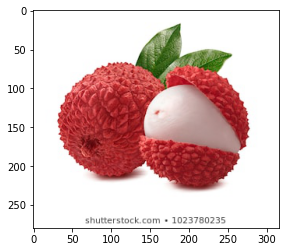

In [54]:
a=imread('https://image.shutterstock.com/image-photo/lychee-leaves-isolated-on-white-260nw-1023780235.jpg')
print(a.shape)
plt.imshow(a)
new=[]
imgresized = resize(a,(50,50,3))
new.append(imgresized.flatten())
new

In [55]:
b=np.array(new)

In [56]:
p=model.predict(b)    
p

array(['Litchi fruit'], dtype=object)